<a href="https://colab.research.google.com/github/NovrianPratama/MachineLearning/blob/dicoding/Dicoding_SL_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression with a Flood Prediction Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4.0,1.0,2.0,3.0,5.0,0.415


In [ ]:
df_train.shape

(636606, 22)

In [ ]:
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636601,636601,3,10,2,5,5,7,6,3,1,...,1,5,3,3,10.0,3.0,7.0,4.0,4.0,0.510
636602,636602,4,3,6,6,5,2,4,5,5,...,4,7,5,8,5.0,5.0,7.0,8.0,8.0,0.530
636603,636603,4,5,5,10,1,6,6,6,6,...,5,5,4,5,8.0,2.0,5.0,5.0,8.0,0.570
636604,636604,4,3,5,10,12,4,7,4,5,...,6,7,7,6,3.0,4.0,3.0,4.0,2.0,0.540


# **Preprocessing**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636606 entries, 0 to 636605
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               636606 non-null  int64  
 1   MonsoonIntensity                 636606 non-null  int64  
 2   TopographyDrainage               636606 non-null  int64  
 3   RiverManagement                  636606 non-null  int64  
 4   Deforestation                    636606 non-null  int64  
 5   Urbanization                     636606 non-null  int64  
 6   ClimateChange                    636606 non-null  int64  
 7   DamsQuality                      636606 non-null  int64  
 8   Siltation                        636606 non-null  int64  
 9   AgriculturalPractices            636606 non-null  int64  
 10  Encroachments                    636606 non-null  int64  
 11  IneffectiveDisasterPreparedness  636606 non-null  int64  
 12  Dr

In [ ]:
# Drop kolom Id karena tidak memiliki korelasi ke fitur lain
df_train.drop(columns=['id'], inplace=True)

In [ ]:
df_train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,...,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000,636606.000000
mean,4.922893,4.928262,4.956116,4.941815,4.940577,4.934347,4.957240,4.927959,4.942118,4.950888,...,4.945871,4.958181,4.930409,4.929679,4.926350,4.926328,4.949108,4.942288,4.939613,0.504522
std,2.056264,2.096324,2.070490,2.050589,2.080161,2.058236,2.083835,2.065661,2.066934,2.084533,...,2.071976,2.087474,2.077670,2.083471,2.063735,2.073764,2.068399,2.080318,2.093440,0.050935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.505000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.540000
max,16.000000,18.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.000000,17.000000,18.000000,18.000000,16.000000,16.000000,0.725000


**Cek Missing Value**

In [ ]:
missing_value = df_train.isnull().sum()
missing_value[missing_value>0]

,0


In [ ]:
miss_column = missing_value[missing_value>0]
df_train[miss_column] = df_train[miss_column].fillna(df_train[miss_column].median())

In [ ]:
missing_value

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


## **Cek Outlier Dataset**

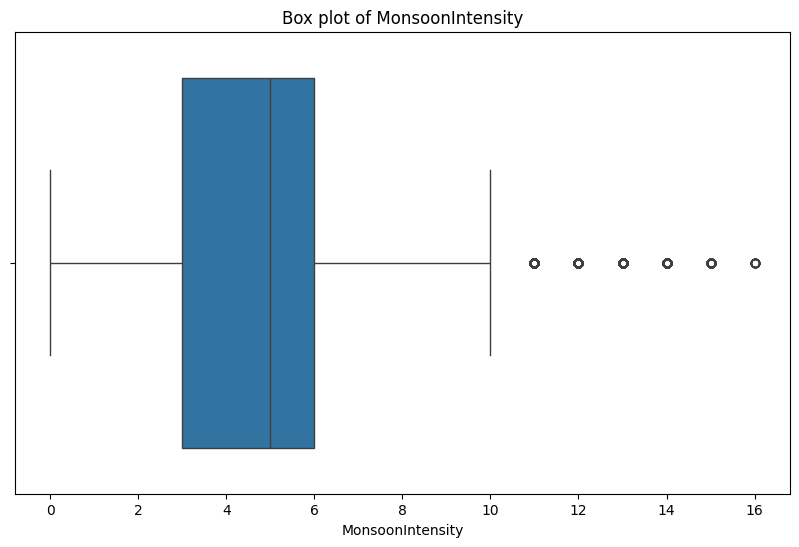

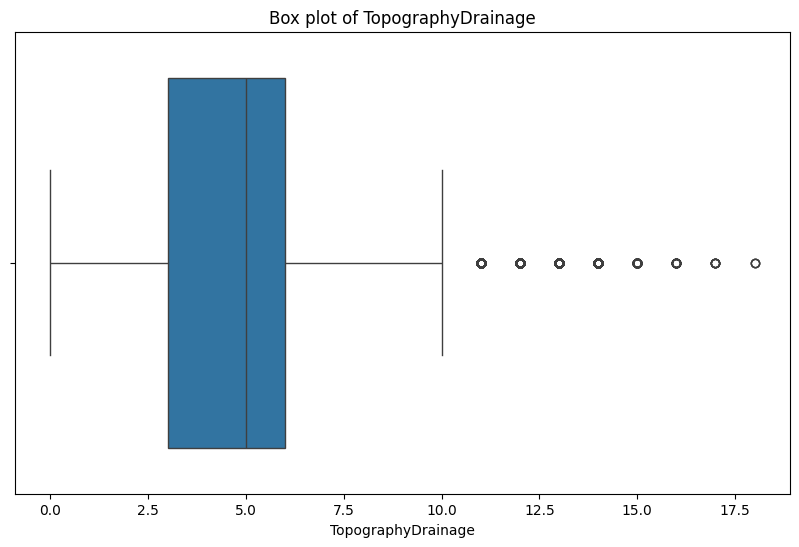

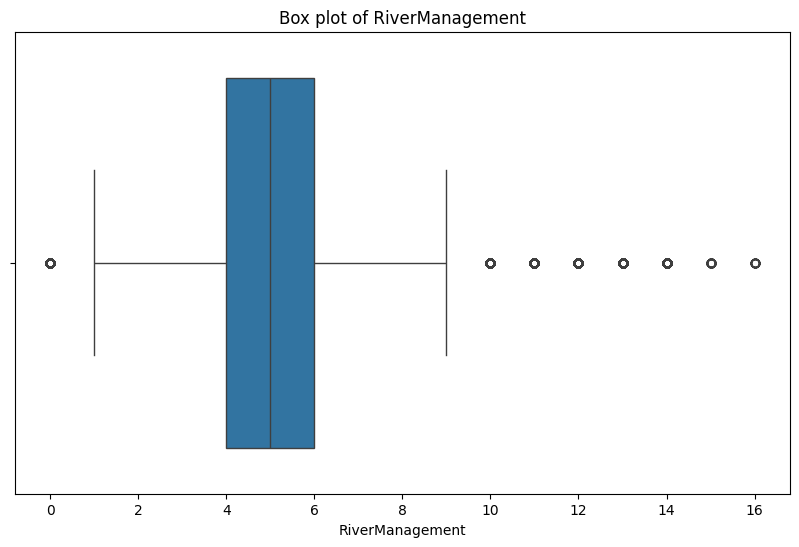

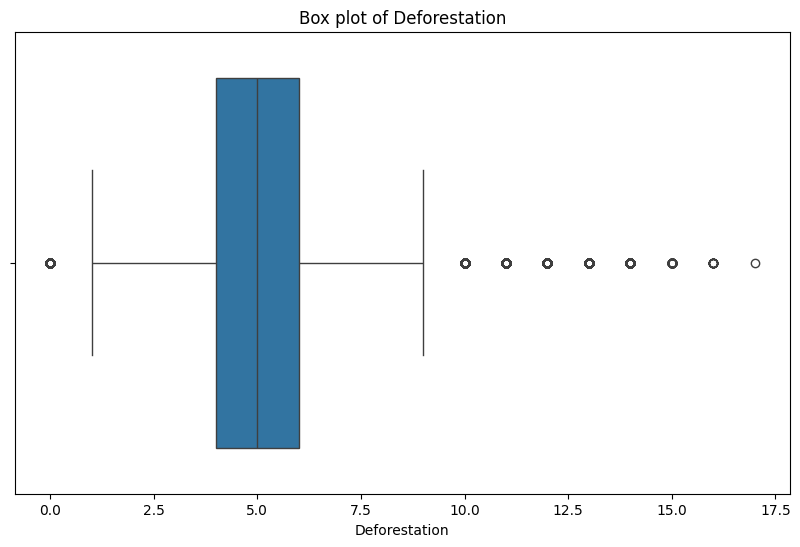

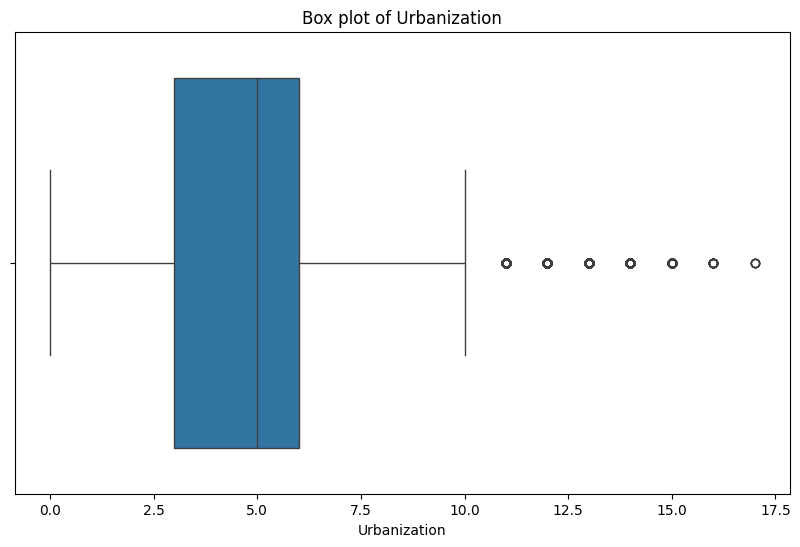

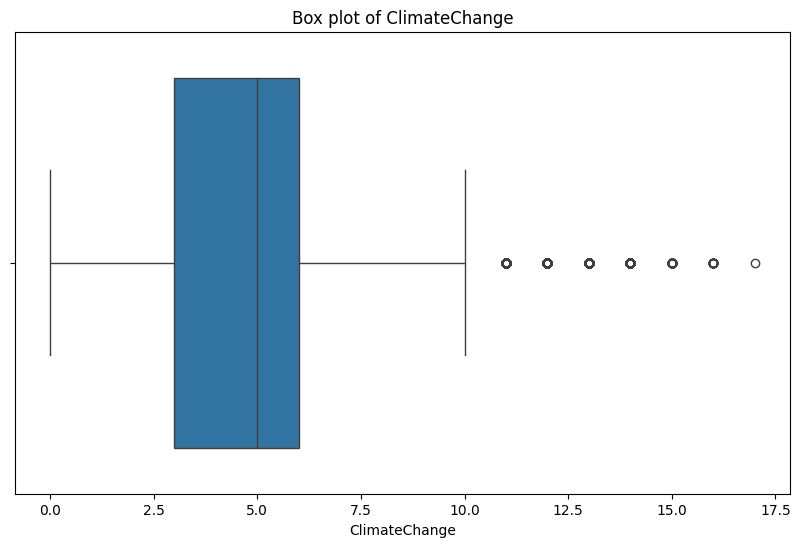

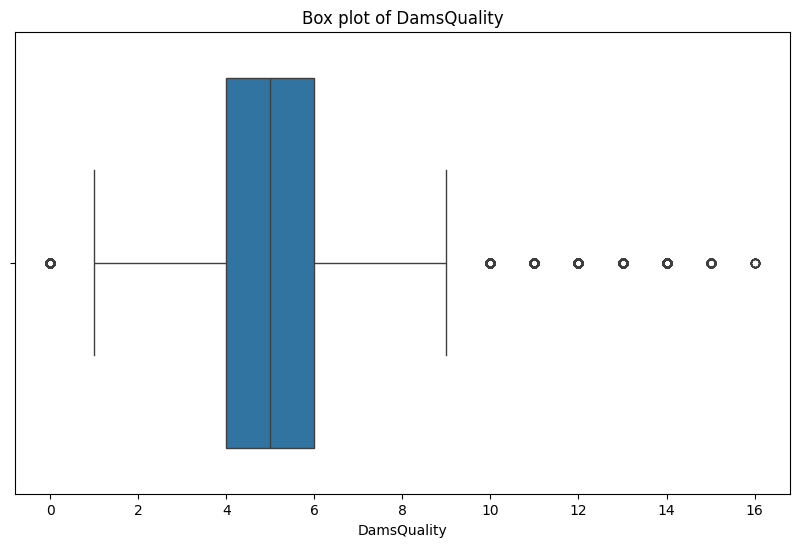

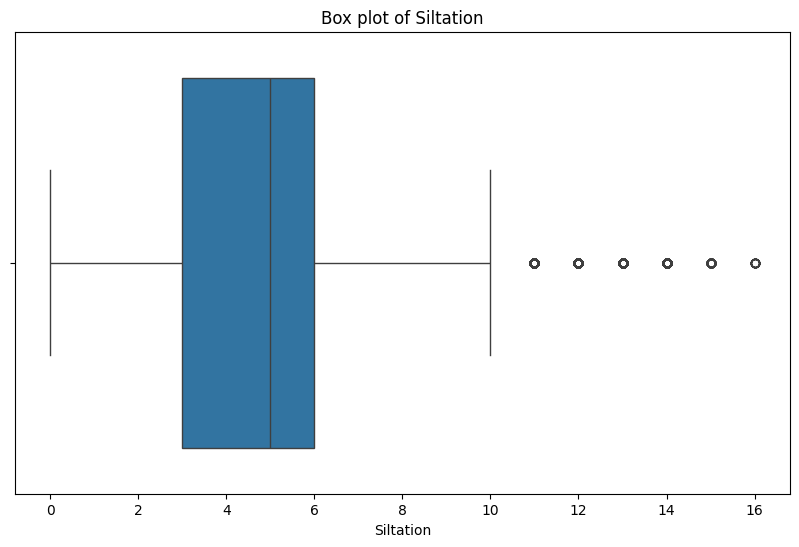

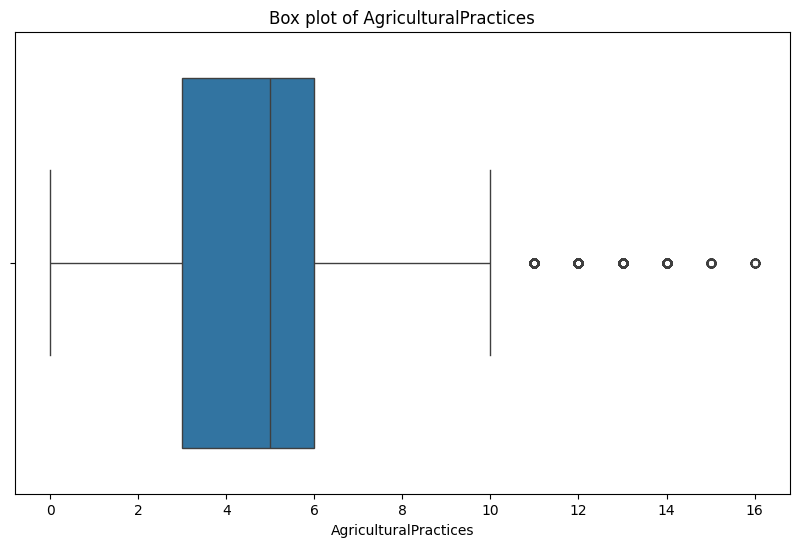

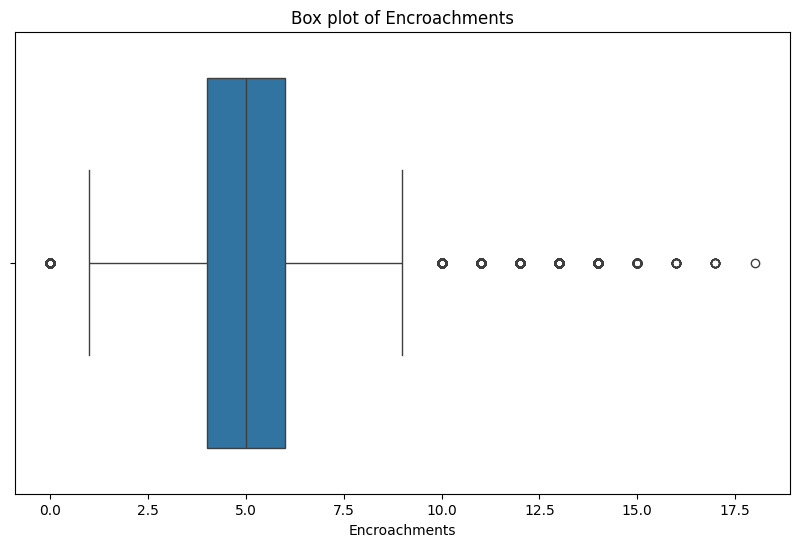

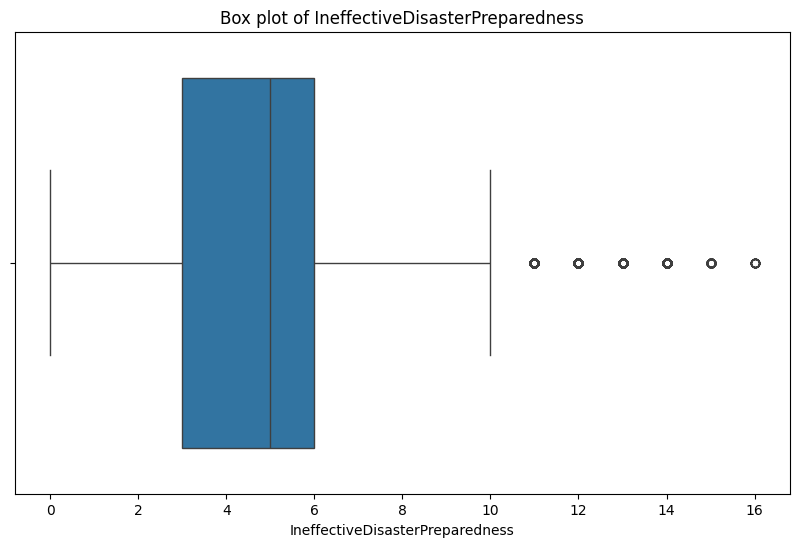

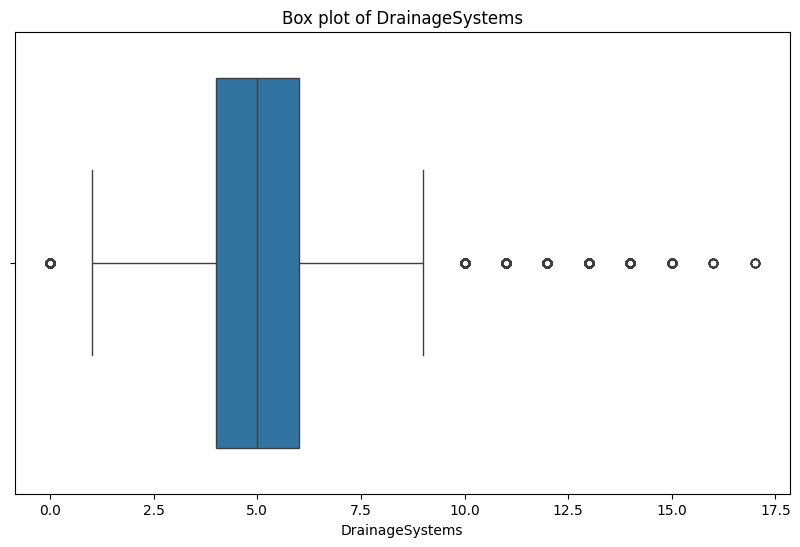

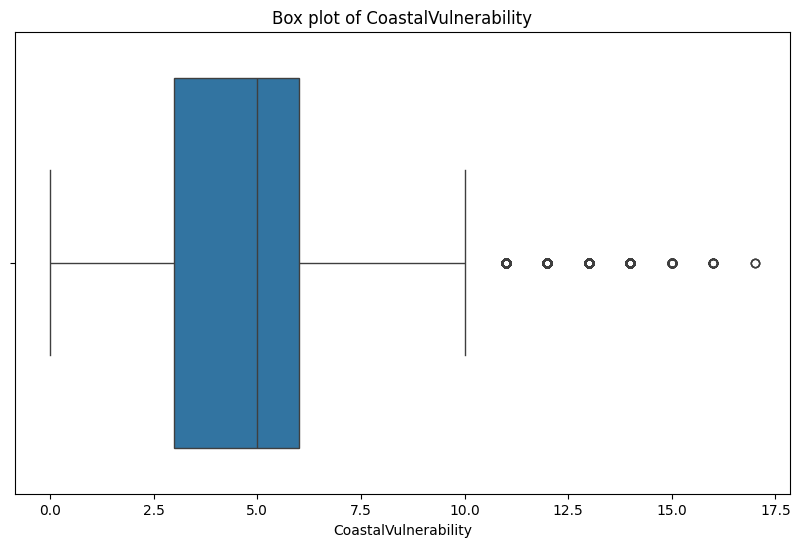

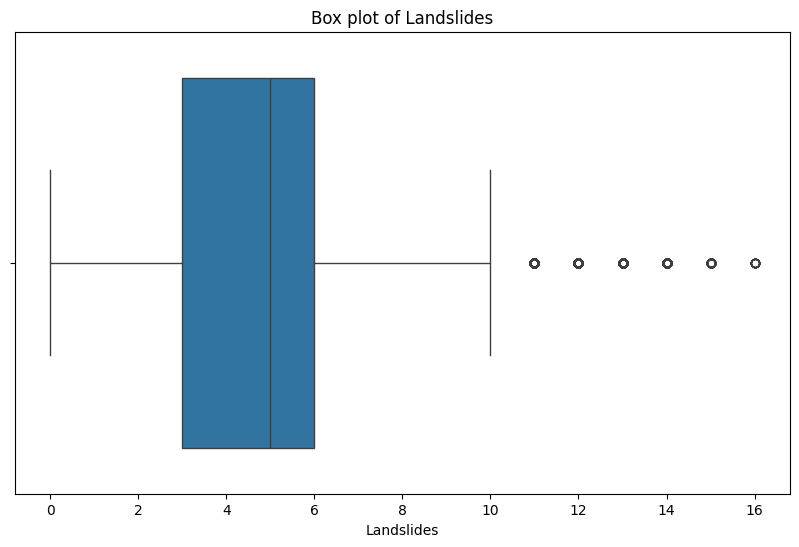

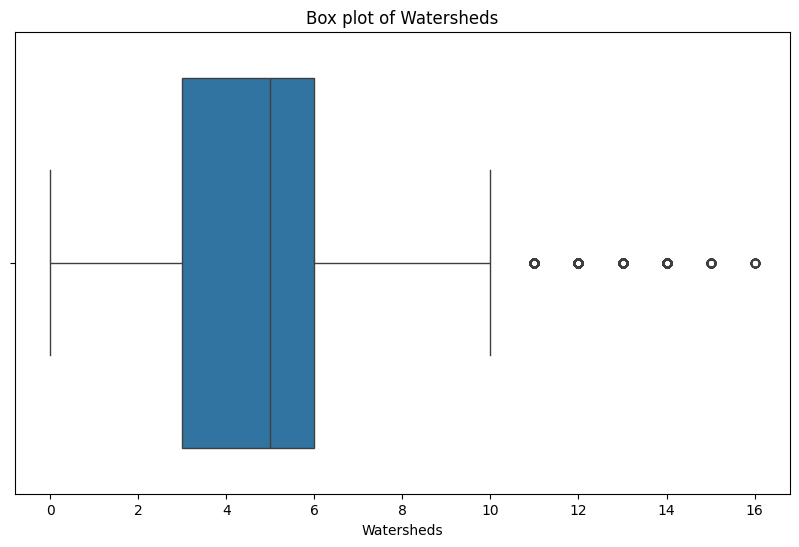

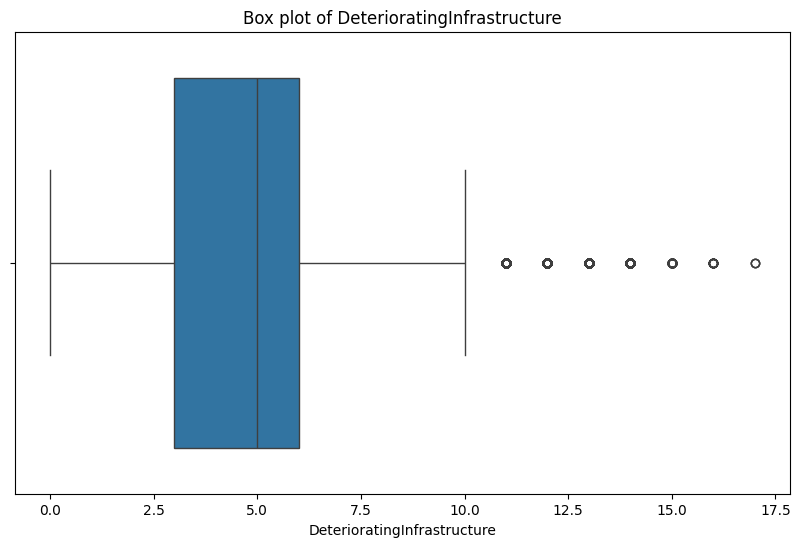

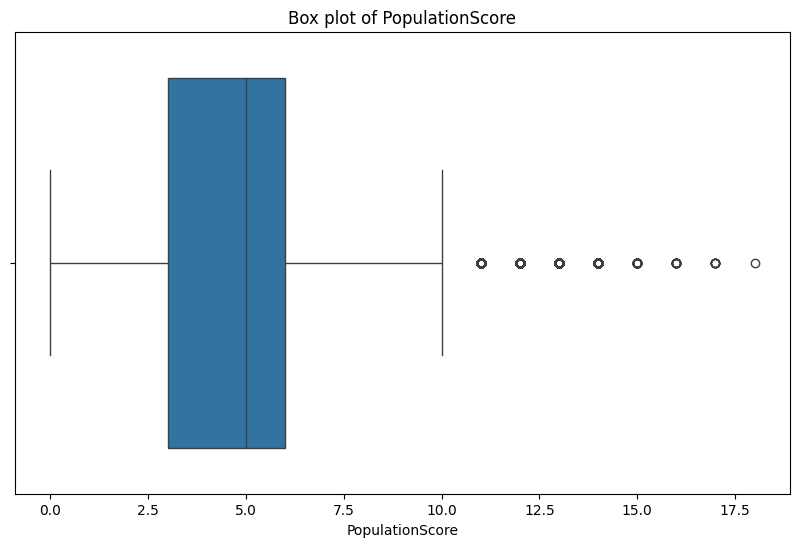

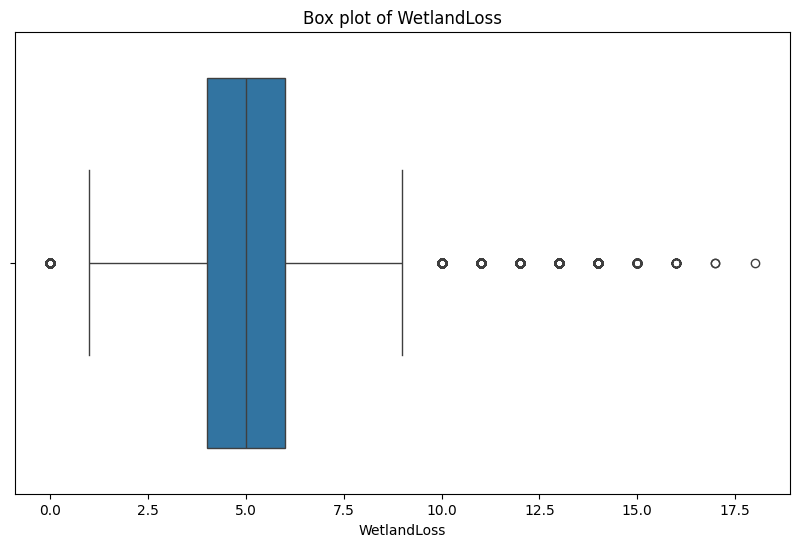

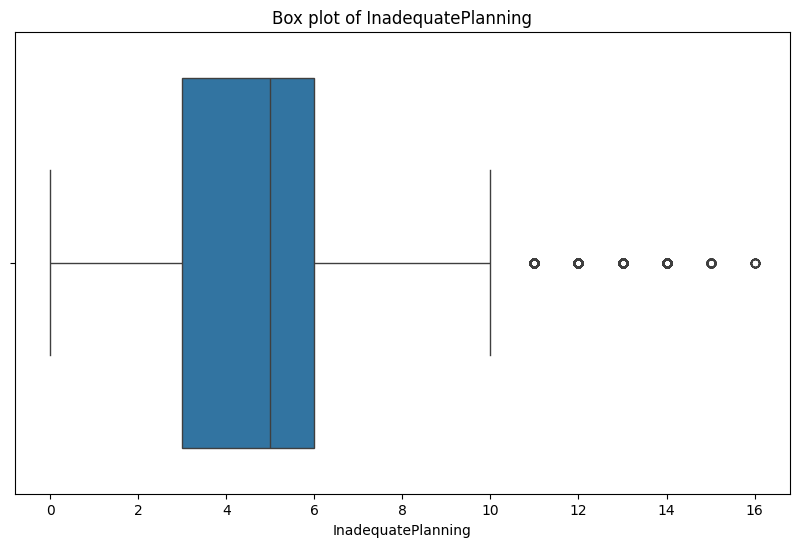

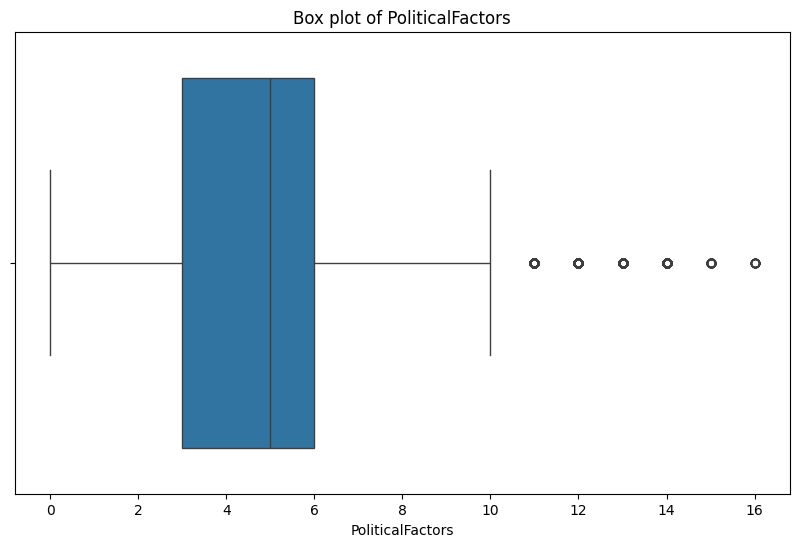

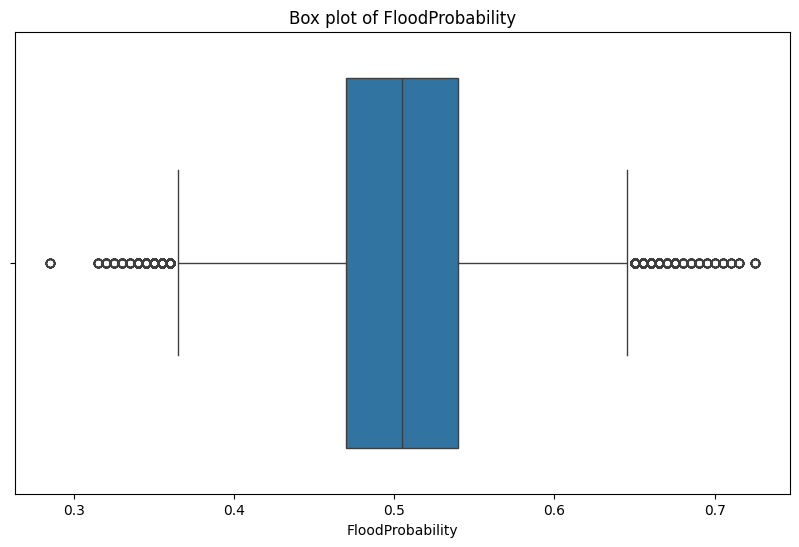

In [ ]:
for feature in df_train:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df_train[feature])
  plt.title(f'Box plot of {feature}')
  plt.show()

In [ ]:
# Memeriksa Outlier menggunakan metode IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# FIlter dataframe untuk hanya menyimpan baris yang tidak mengandug outlier pada
# kolom numeric
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

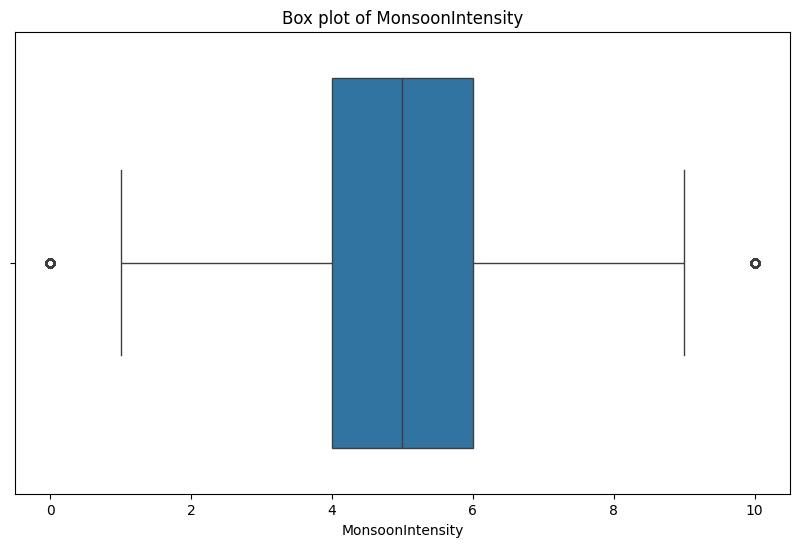

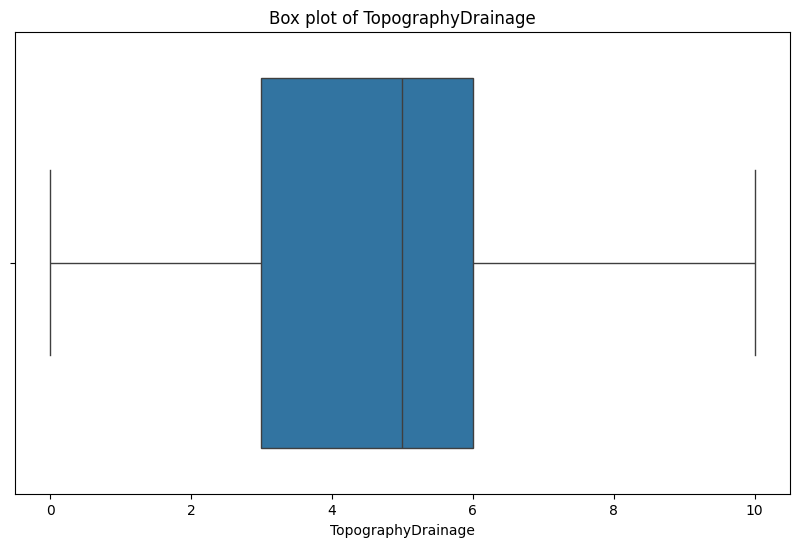

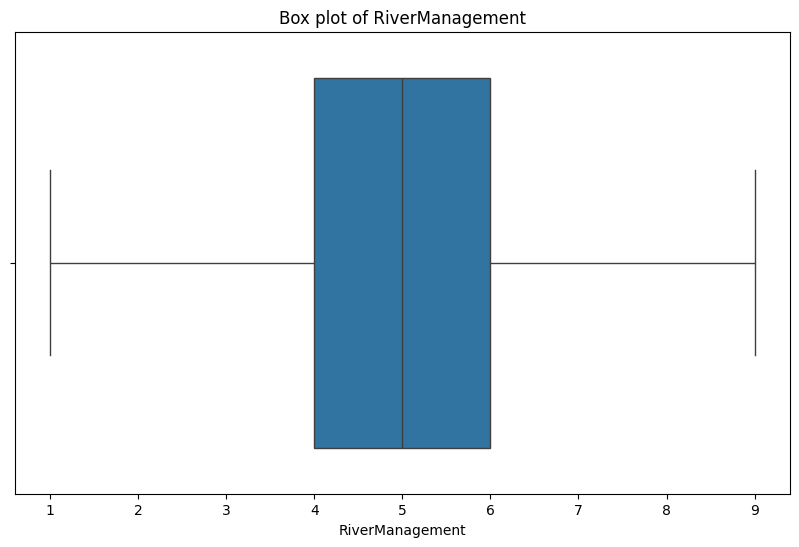

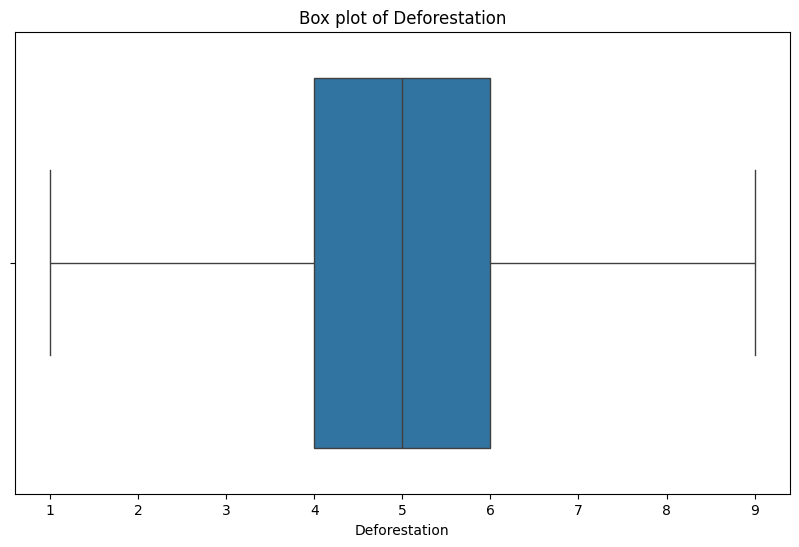

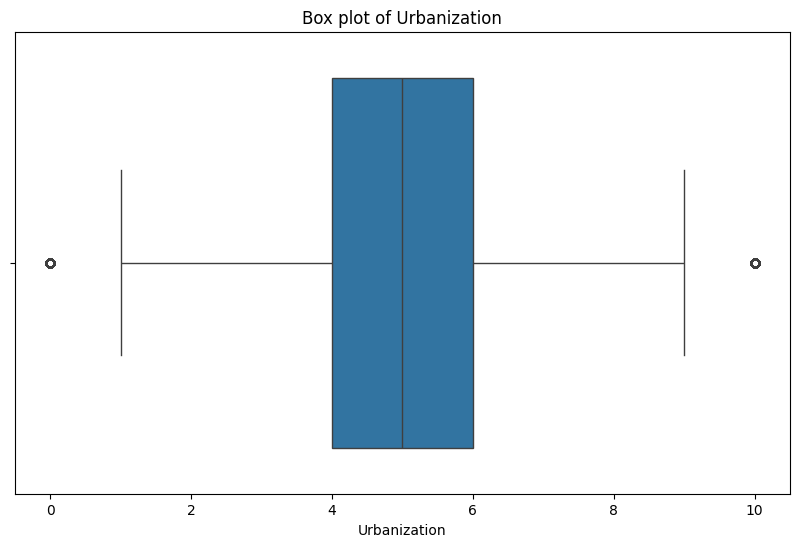

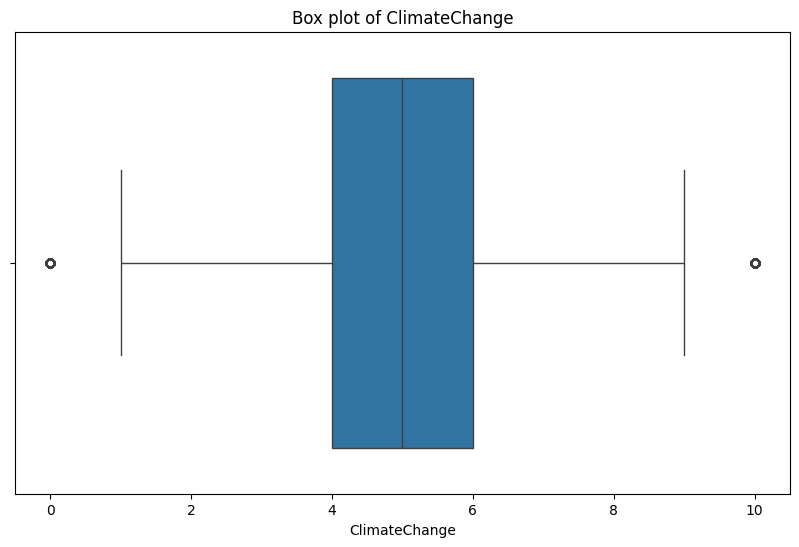

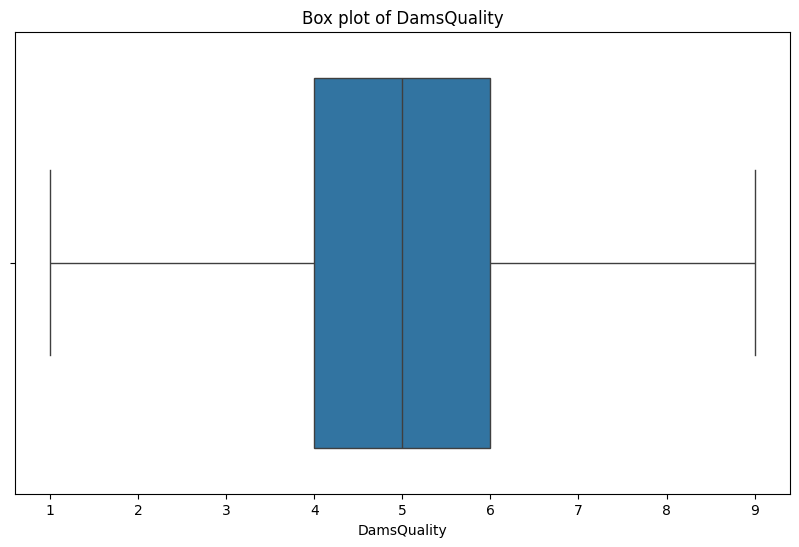

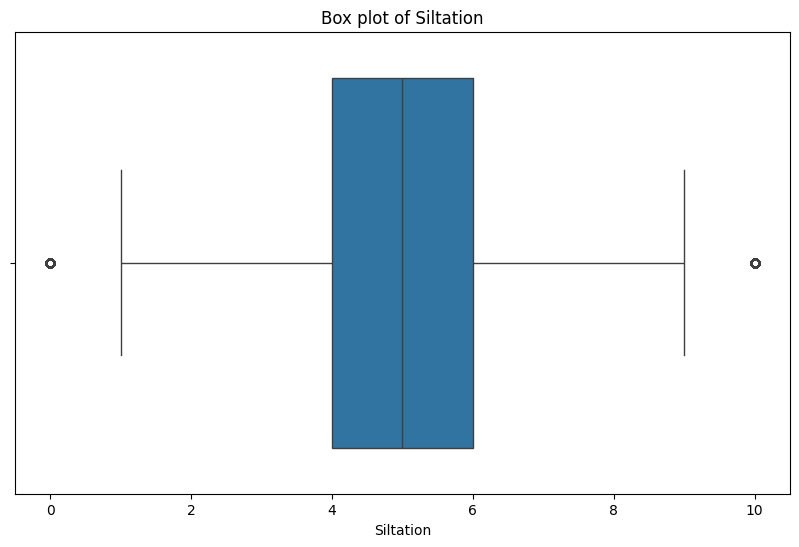

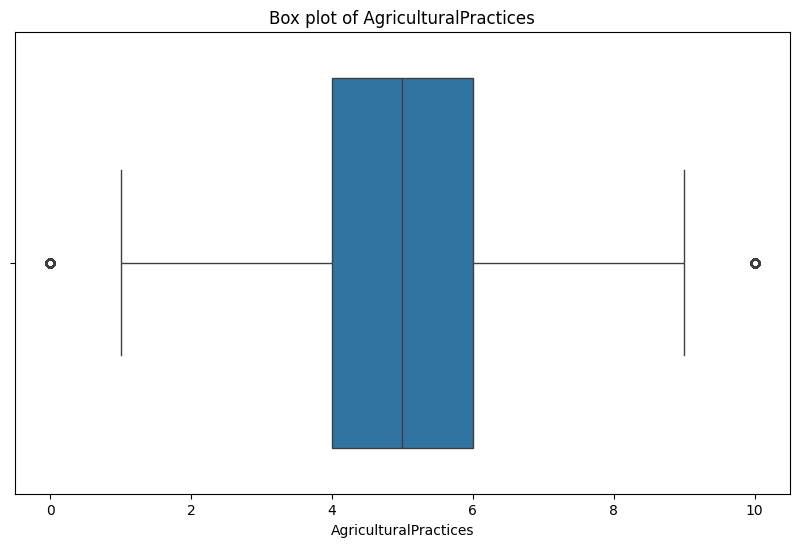

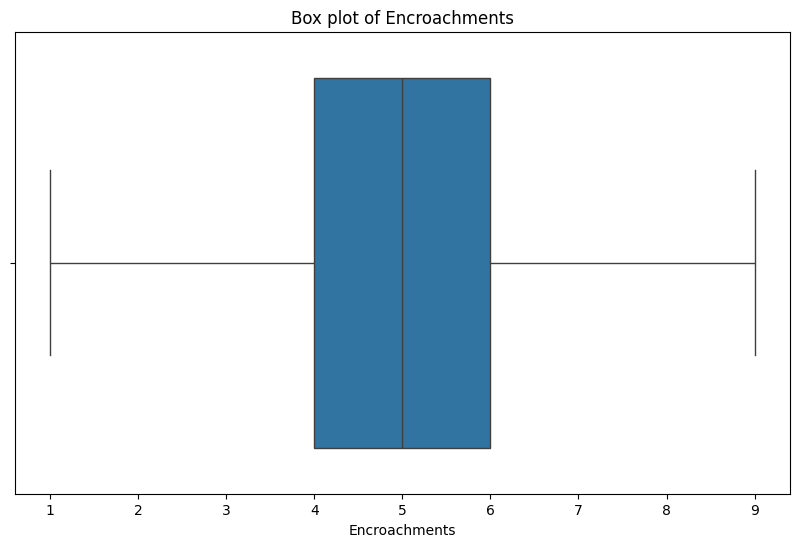

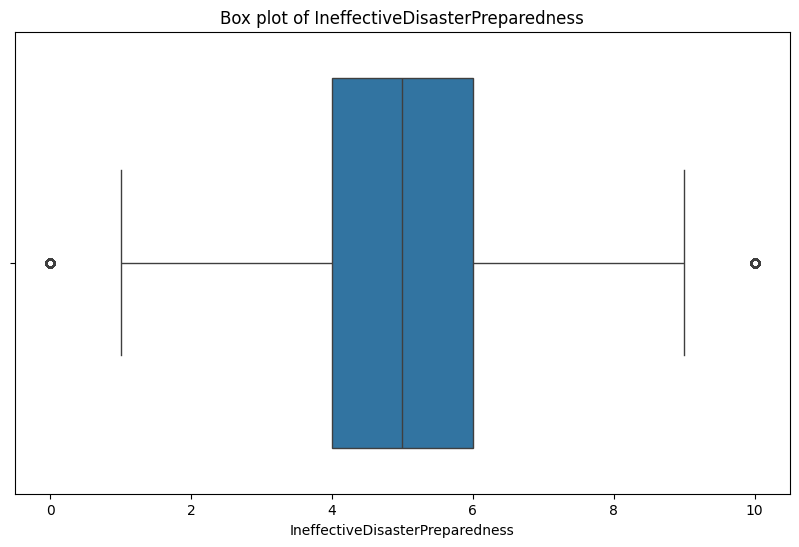

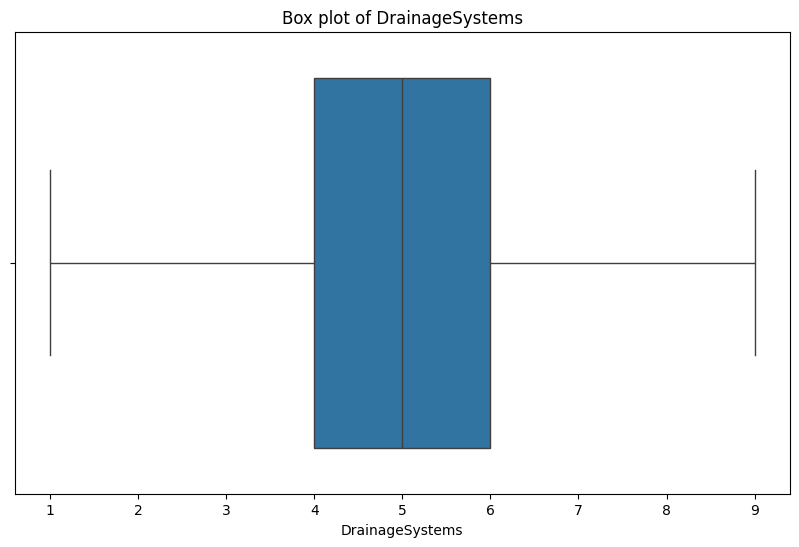

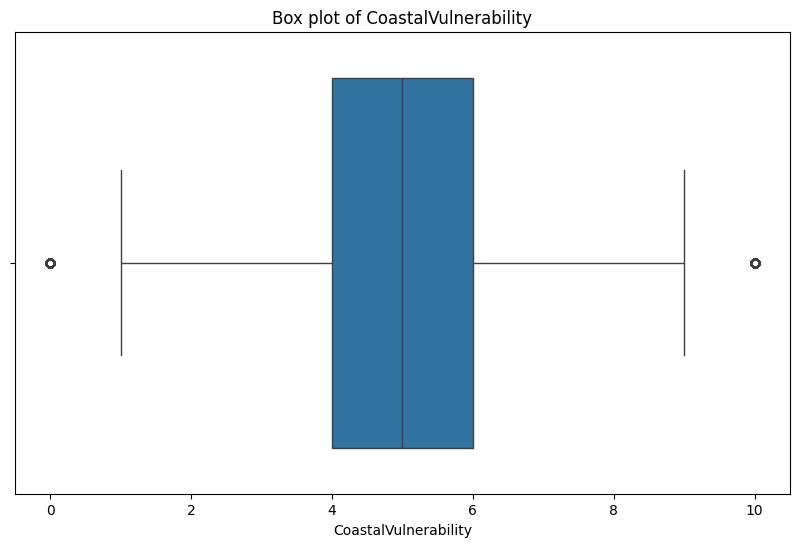

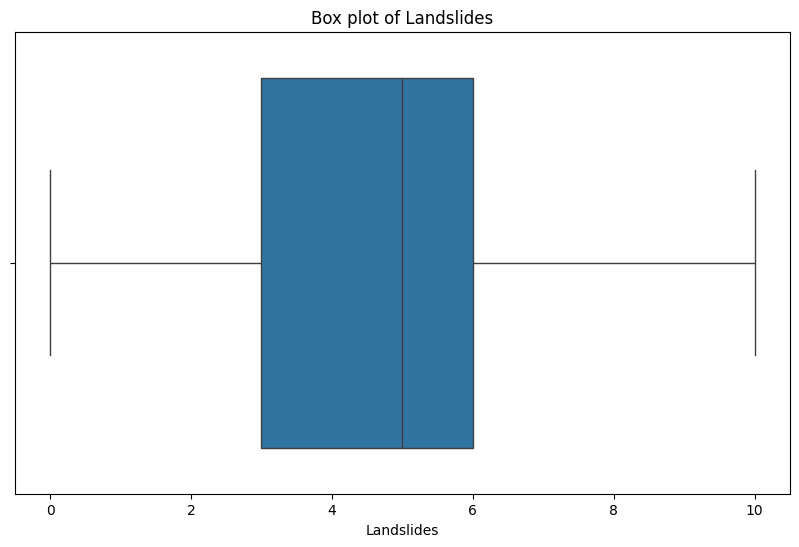

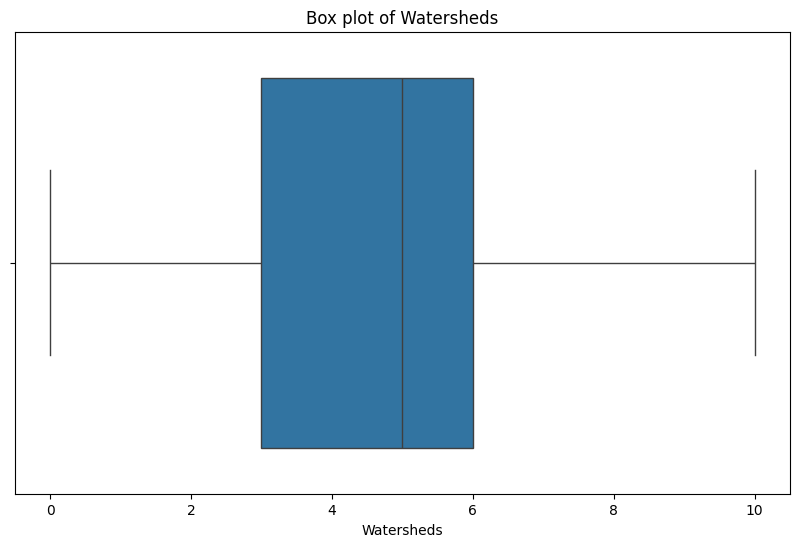

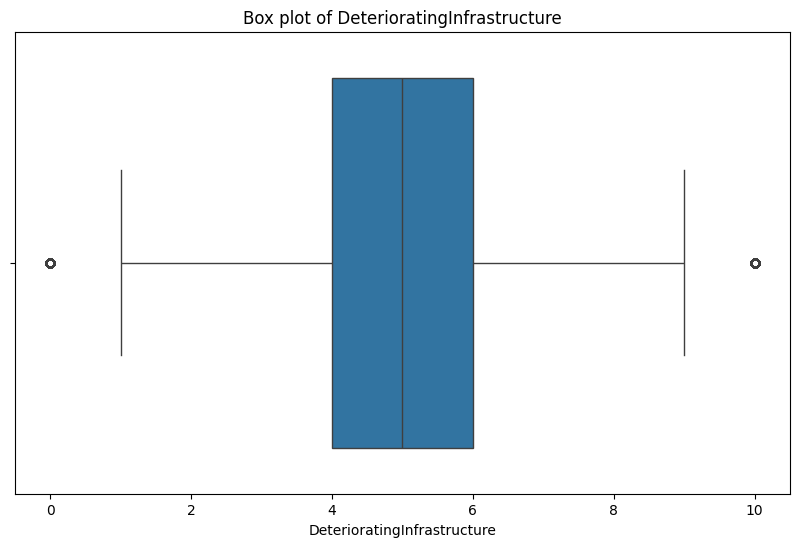

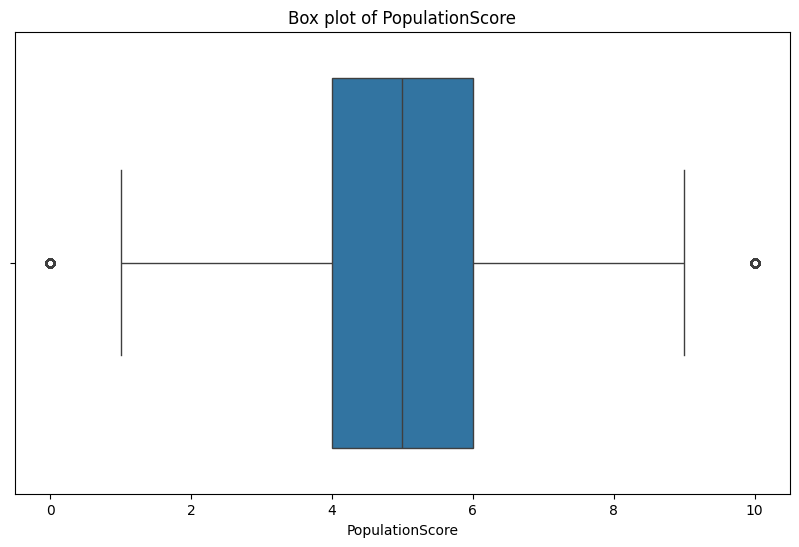

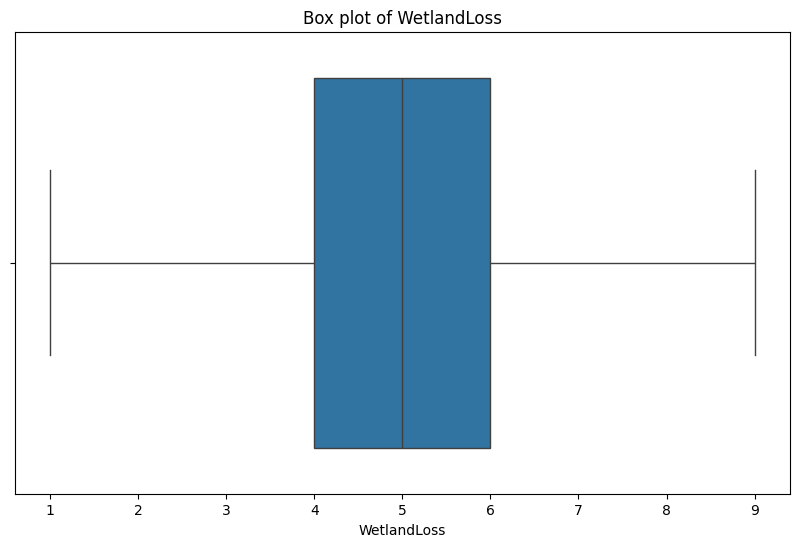

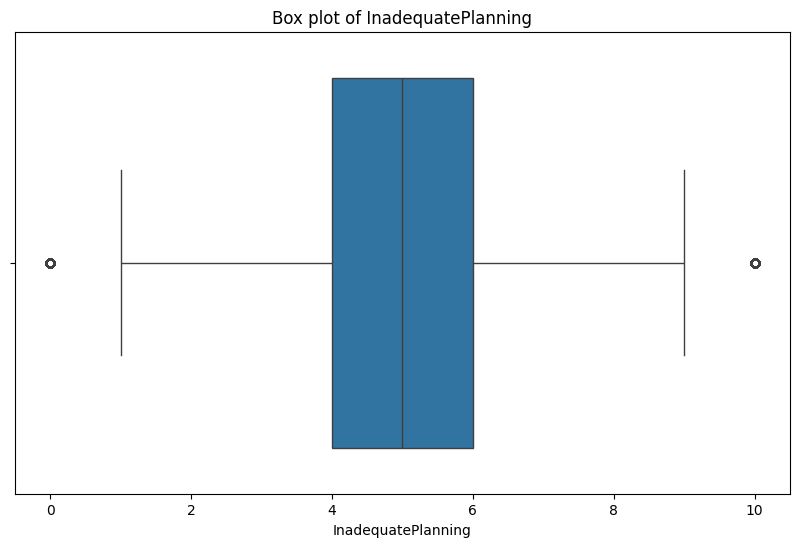

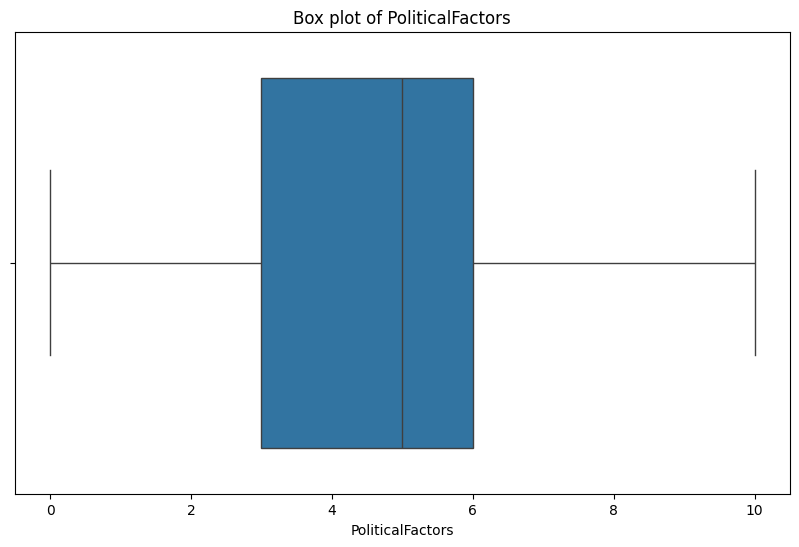

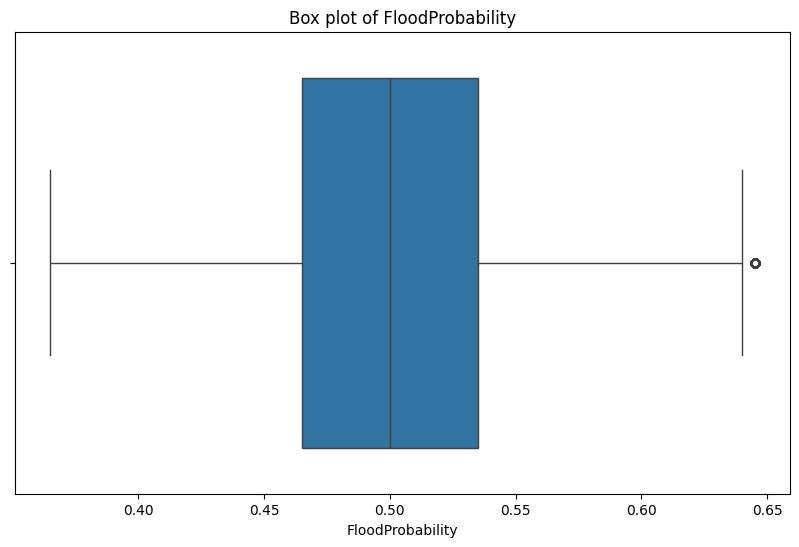

In [ ]:
# cek distribusi data yang telah di lakukan penghapusan outlier
for feature in df:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box plot of {feature}')
  plt.show()

In [ ]:
# Melakukan standarisasi pada dataset
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# proses standarisasi
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

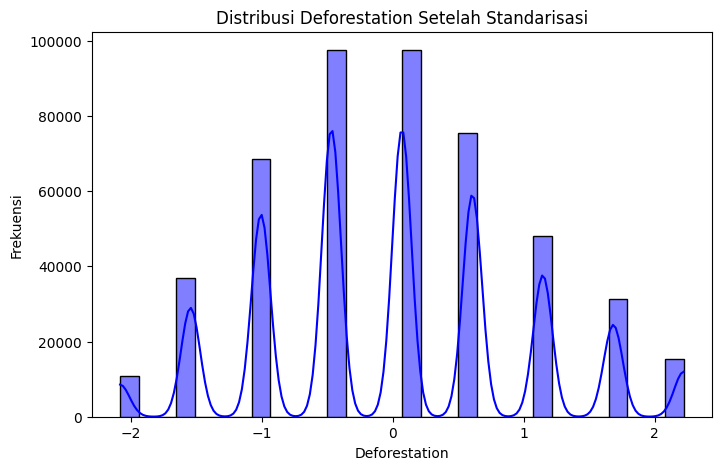

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(8, 5))

# Membuat histogram untuk kolom 'Deforestation' setelah standarisasi
sns.histplot(df['Deforestation'], kde=True, bins=30, color='blue')
plt.title('Distribusi Deforestation Setelah Standarisasi')
plt.xlabel('Deforestation')
plt.ylabel('Frekuensi')

# Menampilkan gambar
plt.show()

In [ ]:
# cek duplikasi dataset

duplicate = df.duplicated()

print(f"Jumlah data duplicate: {df[duplicate]}")

Jumlah data duplicate: Empty DataFrame
Columns: [MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 21 columns]


# Exploratory dan Explanatory Data

In [ ]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,...,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05,4.815470e+05
mean,1.284016e-16,-1.359859e-16,1.852985e-16,-1.723433e-17,1.585101e-16,8.971294e-17,1.384353e-16,6.610427e-18,1.929271e-16,-1.876447e-16,...,1.341563e-16,1.560828e-16,1.564074e-18,6.707813e-17,-1.107837e-16,-9.161639e-17,-5.902167e-18,4.754196e-17,1.621916e-16,-5.728053e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.501935e+00,-2.449740e+00,-2.063620e+00,-2.081512e+00,-2.475080e+00,-2.499687e+00,-2.061996e+00,-2.489561e+00,-2.487196e+00,-2.058945e+00,...,-2.067201e+00,-2.478071e+00,-2.466793e+00,-2.462474e+00,-2.485958e+00,-2.478027e+00,-2.067274e+00,-2.474954e+00,-2.460406e+00,-2.764299e+00
25%,-4.550600e-01,-9.497915e-01,-4.675605e-01,-4.674952e-01,-4.609392e-01,-4.619835e-01,-4.651981e-01,-4.566690e-01,-4.638118e-01,-4.623847e-01,...,-4.633117e-01,-4.671687e-01,-9.580180e-01,-9.570602e-01,-4.547526e-01,-4.544667e-01,-4.652638e-01,-4.618683e-01,-9.575233e-01,-7.149167e-01
50%,5.665868e-02,5.017406e-02,6.445925e-02,7.051040e-02,4.259607e-02,4.744233e-02,6.706781e-02,5.155401e-02,4.203417e-02,6.980193e-02,...,7.131809e-02,3.555693e-02,4.783223e-02,4.654917e-02,5.304872e-02,5.142347e-02,6.873941e-02,4.140324e-02,4.439860e-02,2.367093e-03
75%,5.683773e-01,5.501568e-01,5.964790e-01,6.085160e-01,5.461313e-01,5.568682e-01,5.993337e-01,5.597771e-01,5.478802e-01,6.019886e-01,...,6.059479e-01,5.382826e-01,5.507573e-01,5.483539e-01,5.608501e-01,5.573136e-01,6.027427e-01,5.446748e-01,5.453595e-01,7.196509e-01
max,2.615252e+00,2.550088e+00,2.192538e+00,2.222533e+00,2.560272e+00,2.594571e+00,2.196132e+00,2.592669e+00,2.571264e+00,2.198549e+00,...,2.209837e+00,2.549185e+00,2.562458e+00,2.555573e+00,2.592055e+00,2.580874e+00,2.204752e+00,2.557761e+00,2.549203e+00,2.973971e+00


Data Sudah di standarisasi dengan mendekati angka satu dan rentang nilai yang sama

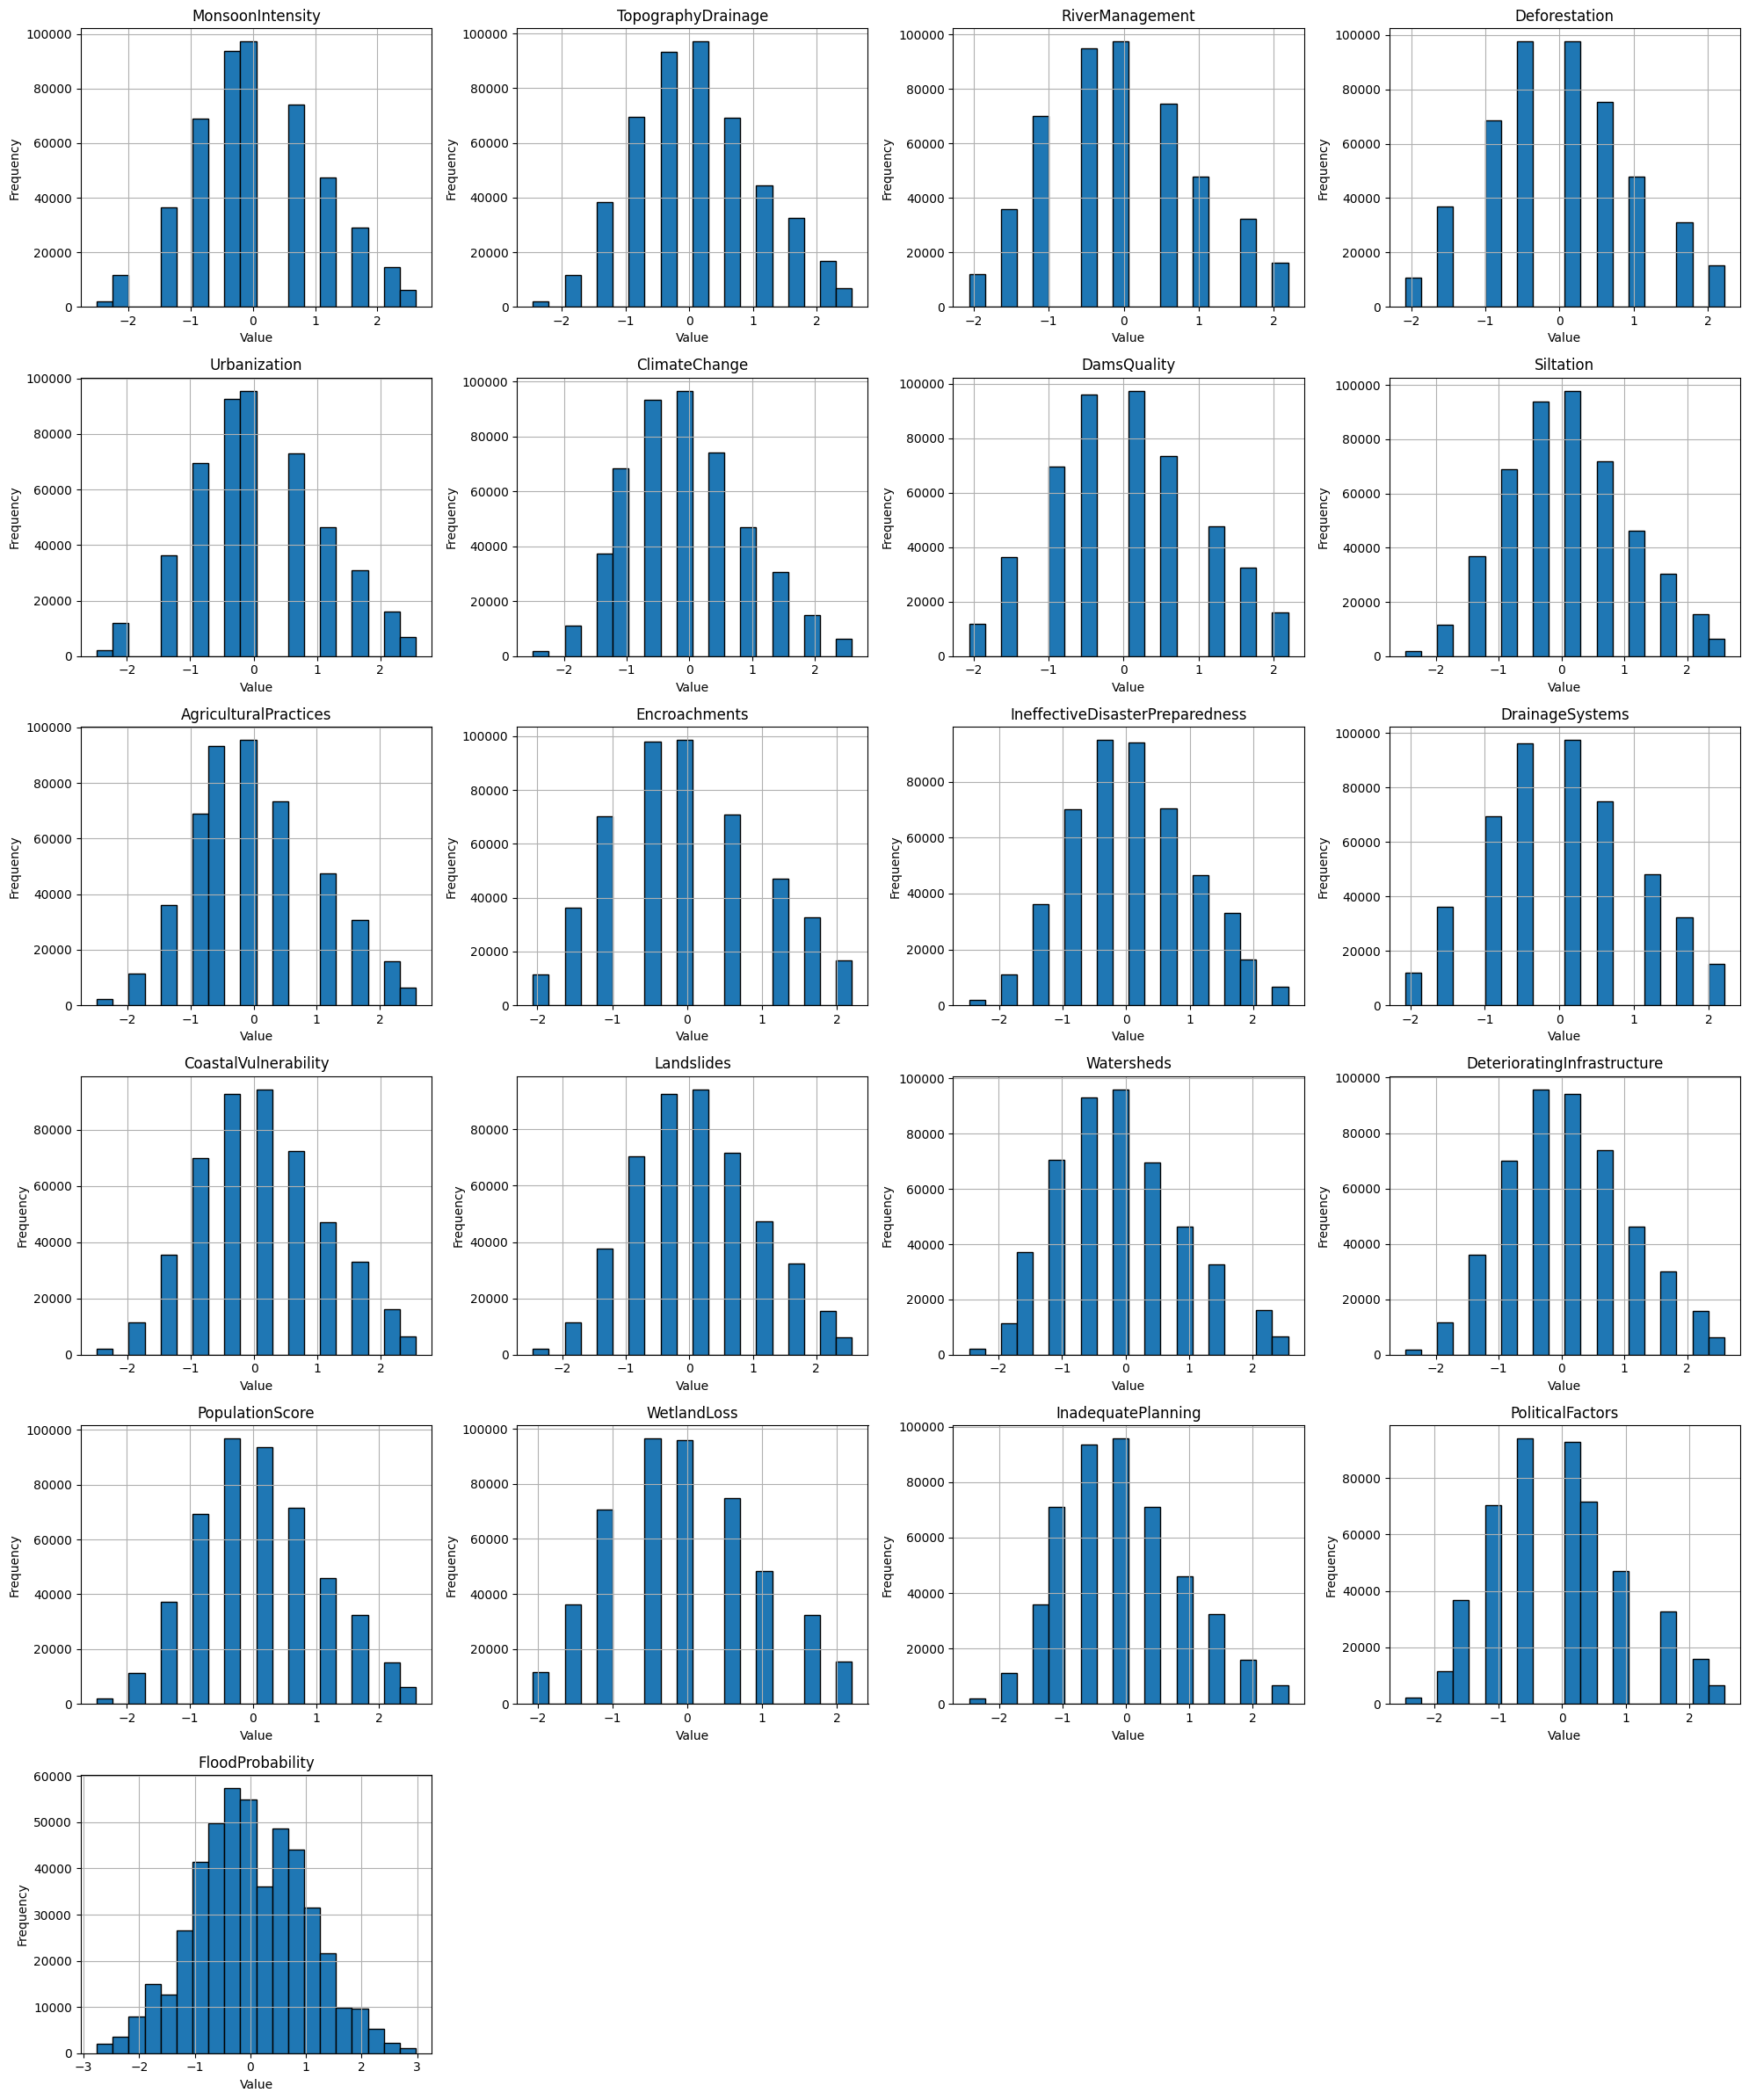

In [ ]:
# visualisasi untuk melihat distribusi data

# menghitung jumlah variabel
num_vars = df.shape[1]

# menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols) # celling divison untuk menentukan jumlah baris

# membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

for i, column in enumerate(df.columns):
  df[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

# menghapus subplot yang tidak terpakai jika ada
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

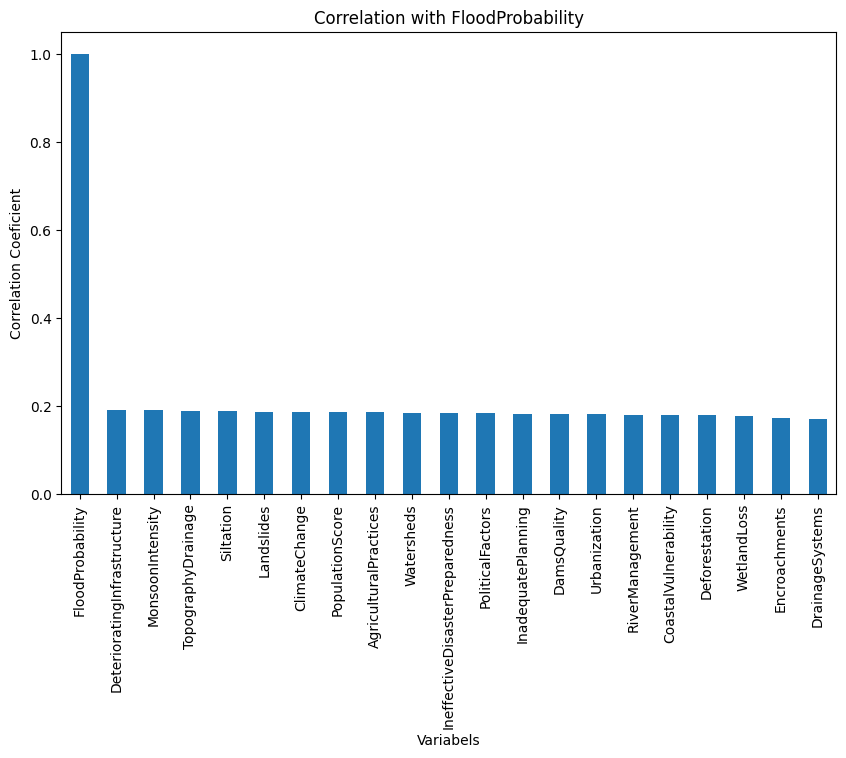

In [ ]:
# visualisasi untuk melihat korelasi antar labe dan fitur

# menghitung korelasi target
target_corr = df.corr()['FloodProbability']

# Mengurutkan korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# membaut visualisasi
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title('Correlation with FloodProbability')
plt.xlabel('Variabels')
plt.ylabel('Correlation Coeficient')
plt.show()

## Data Splitting

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

# spliting data training dan testing
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek jumlah data training dan testing
print(f'Jumlah data training: {len(X)}')
print(f'Jumlah data x_train: {len(x_train)}')
print(f'Jumlah data x_test: {len(x_test)}')

Jumlah data training: 481547
Jumlah data x_train: 385237
Jumlah data x_test: 96310


# **Modeling**

Pada proses ini menggunakan 3 algoritma regresi yaitu:
1. LARS
2. Linear Regresion
3. GradientBoostingRegressor

Confusion Metriks yang digunaka yaitu MAE, MSE, dan R2

In [ ]:
# # Algoritma Pertama LARS
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model lars
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

# menghitung evaluasi metrics
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.807734,1.002805,0.000313


In [ ]:
# Algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

# menghitung evaluasi metrics
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_LR],
    'MSE': [mse_LR],
    'R2': [r2_LR]
}

# Konversi dictionary menjadi DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.807734,1.002805,0.000313
Linear Regression,0.330389,0.172941,0.827597


In [ ]:
# Algoritma Ketiga GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=184)
GB.fit(x_train, y_train)

pred_GB = GB.predict(x_test)

# menghitung evaluasi metrics
mae_GB = mean_absolute_error(y_test, pred_GB)
mse_GB = mean_squared_error(y_test, pred_GB)
r2_GB = r2_score(y_test, pred_GB)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_GB],
    'MSE': [mse_GB],
    'R2': [r2_GB]
}

# Konversi dictionary menjadi DataFrame
df_results.loc['Gradient Boosting Regressor'] = [mae_GB, mse_GB, r2_GB]
df_results

,MAE,MSE,R2
Lars,0.807734,1.002805,0.000313
Linear Regression,0.330389,0.172941,0.827597
Gradient Boosting Regressor,0.515235,0.384633,0.616562
